# Этап 1: Изучение данных


=== Этап 1: Изучение данных ===

1. Загрузка данных...
✓ Данные успешно загружены

2. Базовая информация о данных:
Размер обучающей выборки: (8685, 27)
Размер тестовой выборки: (966, 26)

3. Анализ структуры данных:

Первые 5 строк обучающей выборки:
        Age  Cholesterol  Heart rate  Diabetes  Family History  Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  Previous Heart Problems  Medication Use  Stress Level  Sedentary Hours Per Day    Income       BMI  Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk (Binary)  Blood sugar     CK-MB  Troponin  Gender  Systolic blood pressure  Diastolic blood pressure    id
0  0.359551     0.732143    0.074244       1.0             1.0      1.0      1.0                  1.0                 0.535505     1                      1.0             0.0           8.0                 0.225704  0.105948  0.459176       0.979221                              3.0             0.333333                    

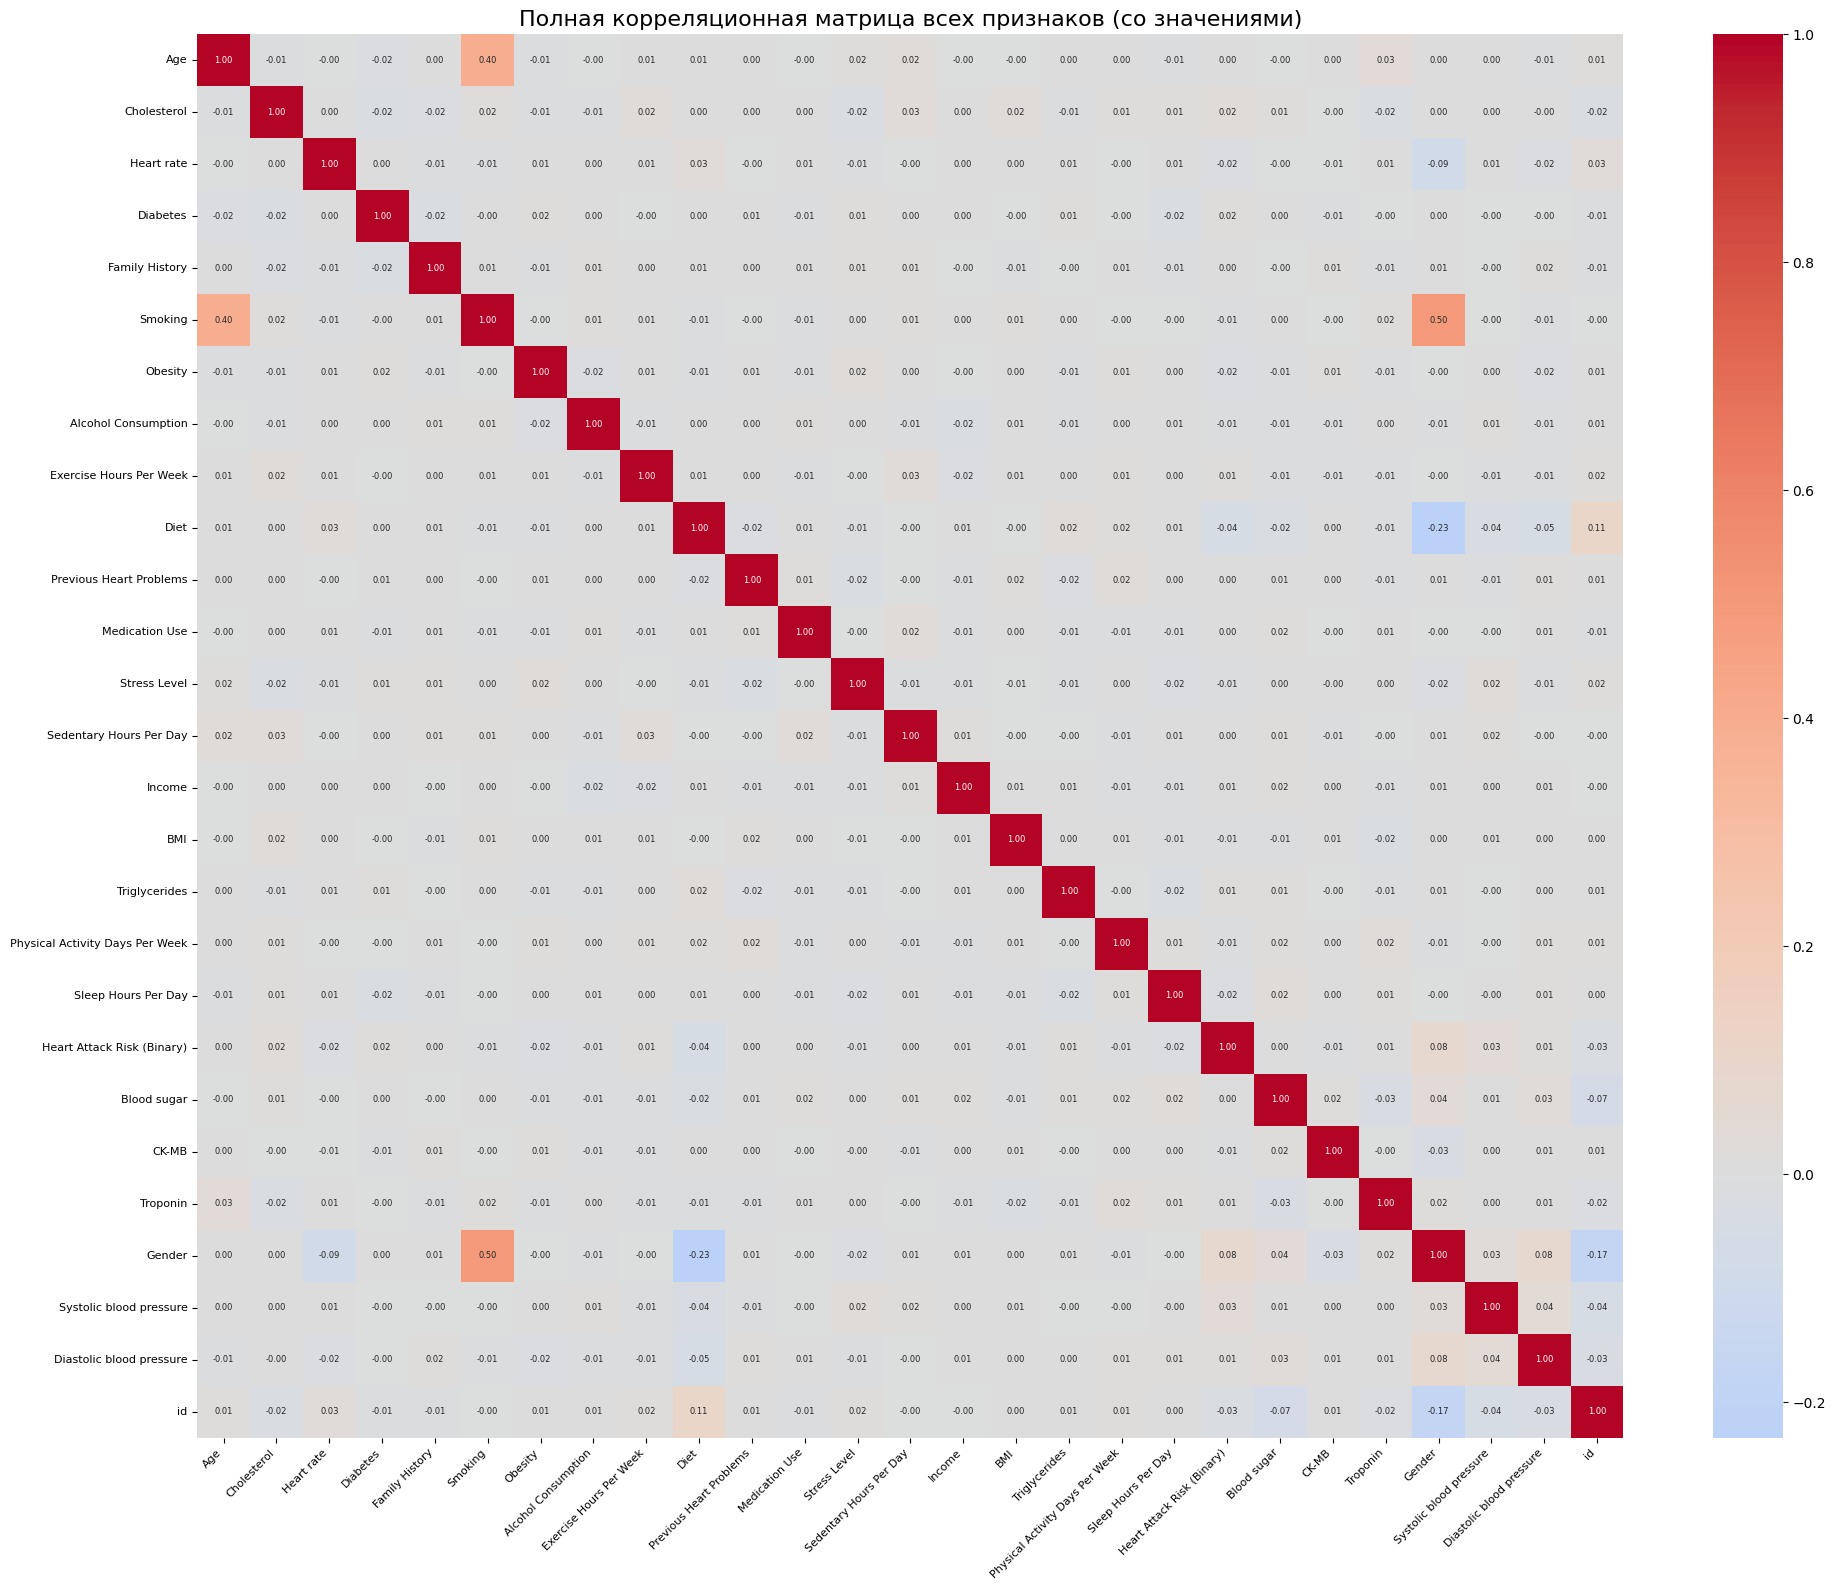

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Этап 1: Изучение данных
print("=== Этап 1: Изучение данных ===")

# Создаем папку для сохранения результатов этапа
stage_folder = "Этап 1"
Path(stage_folder).mkdir(exist_ok=True)

# Загрузка данных
print("\n1. Загрузка данных...")
try:
    train_df = pd.read_csv('heart_train.csv', header=0)
    test_df = pd.read_csv('heart_test.csv', header=0)

        # Удаление первого столбца (с индексом 0)
    train_df = train_df.drop(train_df.columns[0], axis=1)
    test_df = test_df.drop(test_df.columns[0], axis=1) 
    print("✓ Данные успешно загружены")
    
except FileNotFoundError as e:
    print(f"✗ Ошибка загрузки данных: {e}")
    print("Проверьте наличие файлов heart_train.csv и heart_test.csv в текущей директории")
    exit()

# 2. Базовая информация о данных
print("\n2. Базовая информация о данных:")
print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")

# Сохраняем информацию о размерах
with open(f"{stage_folder}/basic_info.txt", "w") as f:
    f.write(f"Размер обучающей выборки: {train_df.shape}\n")
    f.write(f"Размер тестовой выборки: {test_df.shape}\n")

# 3. Анализ структуры данных
print("\n3. Анализ структуры данных:")
print("\nПервые 5 строк обучающей выборки:")
print(train_df.head().to_string())

print("\nПервые 5 строк тестовой выборки:")
print(test_df.head().to_string())

# Сохраняем первые строки для анализа
train_df.head().to_csv(f"{stage_folder}/train_head.csv", index=False)
test_df.head().to_csv(f"{stage_folder}/test_head.csv", index=False)

# 4. Проверка на пропуски
print("\n4. Проверка на пропуски:")
train_missing = train_df.isnull().sum().sum()
test_missing = test_df.isnull().sum().sum()
print(f"Пропусков в обучающей выборке: {train_missing}")
print(f"Пропусков в тестовой выборке: {test_missing}")

# Сохраняем информацию о пропусках
with open(f"{stage_folder}/missing_values.txt", "w") as f:
    f.write(f"Пропусков в обучающей выборке: {train_missing}\n")
    f.write(f"Пропусков в тестовой выборке: {test_missing}\n")

# 5. Статистический анализ
print("\n5. Статистический анализ обучающей выборки:")
train_stats = train_df.describe()
print(train_stats.to_string())

# Сохраняем статистику
train_stats.to_csv(f"{stage_folder}/train_statistics.csv")

# 6. Анализ типов данных
print("\n6. Анализ типов данных:")
print("\nТипы данных в обучающей выборке:")
print(train_df.dtypes.value_counts())
print("\nТипы данных в тестовой выборке:")
print(test_df.dtypes.value_counts())

# 7. Поиск целевой переменной
print("\n7. Поиск целевой переменной:")
# Сравниваем количество столбцов
train_cols = train_df.shape[1]
test_cols = test_df.shape[1]
print(f"Количество столбцов в train: {train_cols}")
print(f"Количество столбцов в test: {test_cols}")

if train_cols > test_cols:
    print("✓ Обнаружена разница в количестве столбцов - вероятно, последний столбец в train это целевая переменная")
    target_column = train_df.iloc[:, -1]
    print(f"\nУникальные значения последнего столбца (предполагаемая целевая переменная):")
    print(target_column.value_counts())
    print(f"Тип данных целевой переменной: {target_column.dtype}")
    
    # Сохраняем информацию о целевой переменной
    with open(f"{stage_folder}/target_analysis.txt", "w") as f:
        f.write(f"Количество столбцов в train: {train_cols}\n")
        f.write(f"Количество столбцов в test: {test_cols}\n")
        f.write("Целевая переменная обнаружена в последнем столбце train\n")
        f.write("Уникальные значения:\n")
        f.write(target_column.value_counts().to_string())
else:
    print("⚠️ Количество столбцов одинаковое - целевая переменная не найдена в данных")
    print("Необходимо уточнить структуру данных или найти целевую переменную другим способом")

# 9. Корреляционный анализ для всех признаков с отображением значений в ячейках
print("\n9. Корреляционный анализ для всех признаков...")
try:
    from sklearn.preprocessing import LabelEncoder
    
    # Создаем копию данных для анализа
    all_features_df = train_df.copy()
    
    # Преобразуем категориальные признаки в числовые
    for col in all_features_df.columns:
        if all_features_df[col].dtype == 'object' or all_features_df[col].dtype.name == 'category':
            try:
                le = LabelEncoder()
                # Заполняем пропуски перед кодированием
                if all_features_df[col].isnull().any():
                    all_features_df[col] = all_features_df[col].fillna('missing')
                all_features_df[col] = le.fit_transform(all_features_df[col].astype(str))
                print(f"✓ Категориальный признак '{col}' преобразован в числовой")
            except Exception as e:
                print(f"⚠️ Ошибка при преобразовании признака '{col}': {e}")
                all_features_df = all_features_df.drop(columns=[col])
    
    if not all_features_df.empty:
        # Вычисляем корреляционную матрицу для всех признаков
        corr_matrix = all_features_df.corr()
        
        # Сохраняем полную корреляционную матрицу
        corr_matrix.to_csv(f"{stage_folder}/full_correlation_matrix.csv")
        print(f"✓ Корреляционная матрица для всех {len(all_features_df.columns)} признаков сохранена")
        
        # Визуализация корреляции с отображением значений в ячейках
        plt.figure(figsize=(20, 16))
        sns.heatmap(corr_matrix, cmap='coolwarm', center=0, 
                    annot=True,  # Включаем отображение значений в ячейках
                    fmt='.2f',   # Формат чисел: 2 знака после запятой
                    annot_kws={'size': 6},  # Размер шрифта для значений
                    xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
        plt.title('Полная корреляционная матрица всех признаков (со значениями)', fontsize=16)
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.yticks(fontsize=8)
        plt.tight_layout()
        plt.savefig(f"{stage_folder}/full_correlation_heatmap_with_values.png", dpi=100, bbox_inches='tight')
        print("✓ Визуализация полной корреляционной матрицы со значениями сохранена")
    else:
        print("⚠️ Нет данных для корреляционного анализа после обработки")
        
except Exception as e:
    print(f"⚠️ Ошибка при полном корреляционном анализе: {e}")
    print(f"Детали ошибки: {str(e)}")

# 10. Анализ дубликатов
print("\n10. Анализ дубликатов:")
train_duplicates = train_df.duplicated().sum()
test_duplicates = test_df.duplicated().sum()
print(f"Дубликатов в обучающей выборке: {train_duplicates}")
print(f"Дубликатов в тестовой выборке: {test_duplicates}")

# 11. Итоги этапа
print(f"\n{'='*50}")
print("ИТОГИ ЭТАПА 1")
print(f"{'='*50}")
print(f"- Данные загружены: train ({train_df.shape}), test ({test_df.shape})")
print(f"- Пропусков: train ({train_missing}), test ({test_missing})")
print(f"- Дубликатов: train ({train_duplicates}), test ({test_duplicates})")
print(f"- Целевая переменная: {'обнаружена' if train_cols > test_cols else 'не обнаружена'}")
print(f"- Результаты сохранены в папку: '{stage_folder}'")
print(f"{'='*50}")

print("\n✅ Этап 1 завершен успешно!")

# Этап 2 

In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Этап 2: Предобработка данных
print("=== Этап 2: Предобработка данных ===")

# Создаем папку для сохранения результатов этапа
stage_folder = "Этап 2"
Path(stage_folder).mkdir(exist_ok=True)

# Загрузка данных (уже обработанных на этапе 1)
print("\n1. Загрузка данных...")
try:
    train_df = pd.read_csv('heart_train.csv', header=0)
    test_df = pd.read_csv('heart_test.csv', header=0)
    
    # Удаление первого столбца (с индексом 0)
    train_df = train_df.drop(train_df.columns[0], axis=1)
    test_df = test_df.drop(test_df.columns[0], axis=1)
    
    print("✓ Данные успешно загружены")
    print(f"Размер обучающей выборки: {train_df.shape}")
    print(f"Размер тестовой выборки: {test_df.shape}")
except FileNotFoundError as e:
    print(f"✗ Ошибка загрузки данных: {e}")
    exit()

# 2. Определение целевой переменной
print("\n2. Определение целевой переменной...")
target_column = 'Heart Attack Risk (Binary)'
if target_column not in train_df.columns:
    print(f"⚠️ Целевая переменная '{target_column}' не найдена в данных")
    print("Попытка автоматического определения...")
    
    # Автоматический поиск бинарной целевой переменной
    binary_candidates = []
    for col in train_df.columns:
        unique_vals = train_df[col].unique()
        if len(unique_vals) == 2 and set(unique_vals).issubset({0, 1, '0', '1', 0.0, 1.0}):
            binary_candidates.append(col)
    
    if binary_candidates:
        target_column = binary_candidates[0]
        print(f"✓ Найдена целевая переменная: '{target_column}'")
    else:
        print("✗ Не удалось определить целевую переменную")
        exit()

print(f"✓ Используемая целевая переменная: '{target_column}'")
print(f"Уникальные значения целевой переменной:")
print(train_df[target_column].value_counts())

# 3. Разделение признаков и целевой переменной
print("\n3. Разделение признаков и целевой переменной...")
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
X_test = test_df.copy()

print(f"Размер X_train: {X_train.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер X_test: {X_test.shape}")

# 4. Анализ пропусков по столбцам
print("\n4. Анализ пропусков по столбцам...")
missing_percent = X_train.isnull().mean() * 100
print("Процент пропусков по столбцам:")
print(missing_percent.sort_values(ascending=False).head(10))

# 5. Удаление столбцов с большим количеством пропусков (>80%)
print("\n5. Удаление столбцов с большим количеством пропусков...")
threshold = 80
cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()

if cols_to_drop:
    print(f"Столбцы для удаления (пропусков > {threshold}%):")
    for col in cols_to_drop:
        print(f"  - {col}: {missing_percent[col]:.1f}% пропусков")
    
    X_train = X_train.drop(columns=cols_to_drop)
    X_test = X_test.drop(columns=[col for col in cols_to_drop if col in X_test.columns])
    print(f"✓ Удалено {len(cols_to_drop)} столбцов")
else:
    print("✓ Нет столбцов для удаления (все столбцы имеют < 80% пропусков)")

# 6. Преобразование типов данных
print("\n6. Преобразование типов данных...")
# Определяем числовые и категориальные признаки
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = [col for col in X_train.columns if col not in numeric_cols]

print(f"Числовых признаков: {len(numeric_cols)}")
print(f"Категориальных признаков: {len(categorical_cols)}")

# 7. Создание пайплайна предобработки
print("\n7. Создание пайплайна предобработки...")

# Для числовых признаков: импутация медианой + стандартизация
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Для категориальных признаков: импутация модой + кодирование
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Объединяем в один препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 8. Обучение пайплайна на обучающих данных
print("\n8. Обучение пайплайна на обучающих данных...")
preprocessor.fit(X_train)

# 9. Преобразование данных
print("\n9. Преобразование данных...")
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Размер преобразованного X_train: {X_train_processed.shape}")
print(f"Размер преобразованного X_test: {X_test_processed.shape}")

# 10. Сохранение результатов и объектов пайплайна
print("\n10. Сохранение результатов и объектов пайплайна...")

# Сохраняем преобразованные данные
np.save(f"{stage_folder}/X_train_processed.npy", X_train_processed)
np.save(f"{stage_folder}/y_train.npy", y_train.values)
np.save(f"{stage_folder}/X_test_processed.npy", X_test_processed)

# Сохраняем информацию о признаках
feature_names = numeric_cols + categorical_cols
with open(f"{stage_folder}/feature_names.txt", "w") as f:
    f.write("Признаки после предобработки:\n")
    for i, name in enumerate(feature_names):
        f.write(f"{i}: {name}\n")

# Сохраняем сам пайплайн для будущего использования
joblib.dump(preprocessor, f"{stage_folder}/preprocessor.pkl")
print(f"✓ Пайплайн предобработки сохранен в '{stage_folder}/preprocessor.pkl'")

# 11. Дополнительная информация о предобработке
print("\n11. Дополнительная информация о предобработке")
print(f"Исходное количество признаков: {train_df.shape[1] - 1}")  # -1 для целевой переменной
print(f"Количество признаков после удаления столбцов с пропусками: {X_train.shape[1]}")
print(f"Количество признаков после преобразования: {X_train_processed.shape[1]}")

# Анализ распределения целевой переменной
print(f"\nРаспределение целевой переменной:")
print(y_train.value_counts(normalize=True) * 100)

# Итоги этапа
print(f"\n{'='*50}")
print("ИТОГИ ЭТАПА 2")
print(f"{'='*50}")
print(f"- Исходные данные: train ({train_df.shape}), test ({test_df.shape})")
print(f"- Удалено столбцов с пропусками >80%: {len(cols_to_drop)}")
print(f"- Числовых признаков: {len(numeric_cols)}")
print(f"- Категориальных признаков: {len(categorical_cols)}")
print(f"- Преобразованные данные сохранены в папку: '{stage_folder}'")
print(f"- Пайплайн предобработки сохранен для будущего использования")
print(f"{'='*50}")

print("\n✅ Этап 2 завершен успешно!")
print("Готовы к обучению моделей на следующем этапе!")

=== Этап 2: Предобработка данных ===

1. Загрузка данных...
✓ Данные успешно загружены
Размер обучающей выборки: (8685, 27)
Размер тестовой выборки: (966, 26)

2. Определение целевой переменной...
✓ Используемая целевая переменная: 'Heart Attack Risk (Binary)'
Уникальные значения целевой переменной:
Heart Attack Risk (Binary)
0.0    5672
1.0    3013
Name: count, dtype: int64

3. Разделение признаков и целевой переменной...
Размер X_train: (8685, 26)
Размер y_train: (8685,)
Размер X_test: (966, 26)

4. Анализ пропусков по столбцам...
Процент пропусков по столбцам:
Family History                     2.797927
Diabetes                           2.797927
Alcohol Consumption                2.797927
Obesity                            2.797927
Smoking                            2.797927
Previous Heart Problems            2.797927
Physical Activity Days Per Week    2.797927
Stress Level                       2.797927
Medication Use                     2.797927
Age                               

# Этап 3

=== Этап 3: Обучение моделей ===

1. Загрузка преобразованных данных из этапа 2...
✓ Данные успешно загружены
Размер обучающей выборки: (8685, 26)
Размер целевой переменной: (8685,)
Размер тестовой выборки: (966, 26)
Количество тестовых id: 966

2. Разделение данных на обучение и валидацию...
Размер обучающей выборки после разделения: (6948, 26)
Размер валидационной выборки: (1737, 26)
Баланс классов в обучающей выборке: [4538 2410]
Баланс классов в валидационной выборке: [1134  603]

3. Обучение базовой модели CatBoost...
0:	test: 0.5150563	best: 0.5150563 (0)	total: 147ms	remaining: 2m 27s
100:	test: 0.5646240	best: 0.5665266 (82)	total: 909ms	remaining: 8.09s
200:	test: 0.5753581	best: 0.5787319 (161)	total: 1.65s	remaining: 6.56s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5787318551
bestIteration = 161

Shrink model to first 162 iterations.

4. Оценка качества модели...
ROC AUC на валидации: 0.5787
Accuracy на валидации: 0.6517
F1-score на валидации: 0.1194

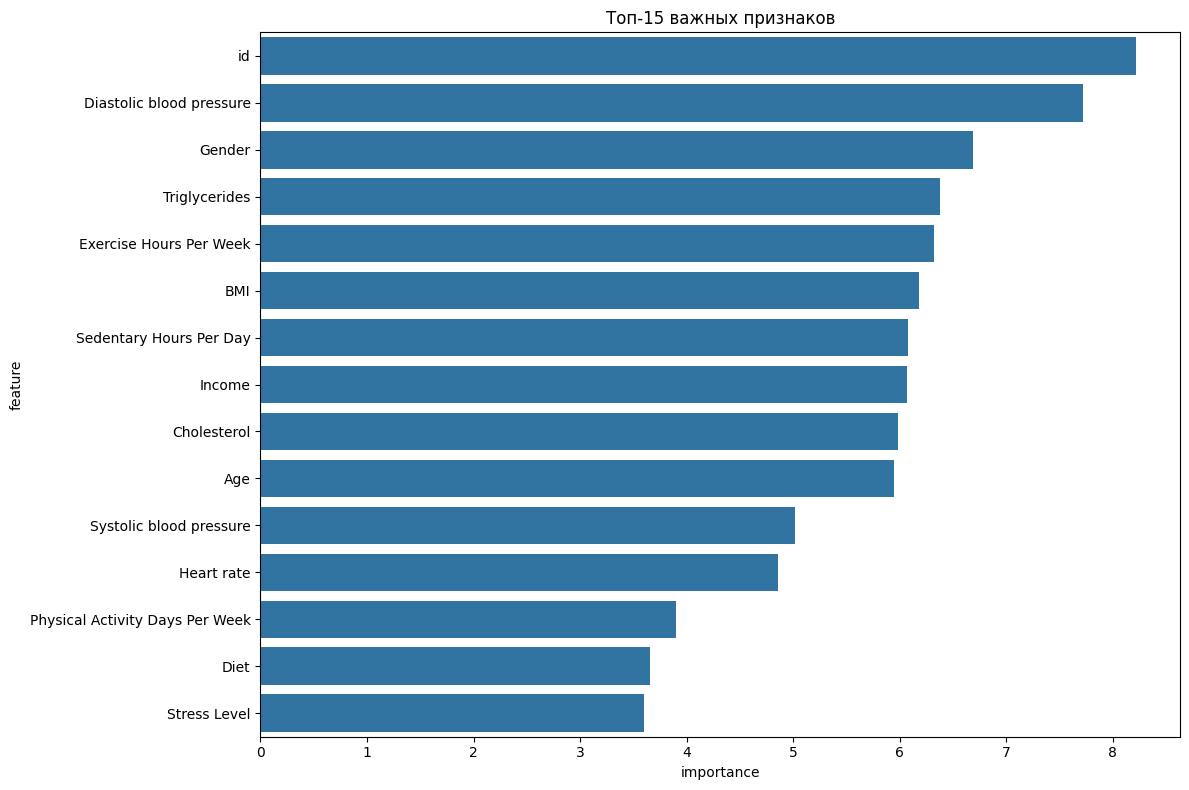


6. Кросс-валидация для надежной оценки...

Fold 1/5
Fold 1 ROC AUC: 0.5600

Fold 2/5
Fold 2 ROC AUC: 0.5787

Fold 3/5
Fold 3 ROC AUC: 0.5763

Fold 4/5
Fold 4 ROC AUC: 0.5562

Fold 5/5
Fold 5 ROC AUC: 0.5803

Средний ROC AUC на кросс-валидации: 0.5703 ± 0.0101

7. Обучение финальной модели на всех данных...
0:	total: 11ms	remaining: 2.3s
1:	total: 18.4ms	remaining: 1.92s
2:	total: 38.3ms	remaining: 2.66s
3:	total: 64.4ms	remaining: 3.33s
4:	total: 82.4ms	remaining: 3.4s
5:	total: 93.2ms	remaining: 3.19s
6:	total: 101ms	remaining: 2.93s
7:	total: 111ms	remaining: 2.82s
8:	total: 121ms	remaining: 2.72s
9:	total: 128ms	remaining: 2.57s
10:	total: 136ms	remaining: 2.47s
11:	total: 143ms	remaining: 2.37s
12:	total: 150ms	remaining: 2.29s
13:	total: 158ms	remaining: 2.22s
14:	total: 164ms	remaining: 2.15s


You should provide test set for use best model. use_best_model parameter has been switched to false value.


15:	total: 174ms	remaining: 2.12s
16:	total: 190ms	remaining: 2.17s
17:	total: 197ms	remaining: 2.11s
18:	total: 205ms	remaining: 2.08s
19:	total: 212ms	remaining: 2.02s
20:	total: 221ms	remaining: 2s
21:	total: 228ms	remaining: 1.96s
22:	total: 237ms	remaining: 1.93s
23:	total: 243ms	remaining: 1.9s
24:	total: 251ms	remaining: 1.87s
25:	total: 258ms	remaining: 1.84s
26:	total: 265ms	remaining: 1.8s
27:	total: 270ms	remaining: 1.77s
28:	total: 277ms	remaining: 1.74s
29:	total: 284ms	remaining: 1.72s
30:	total: 291ms	remaining: 1.69s
31:	total: 299ms	remaining: 1.67s
32:	total: 305ms	remaining: 1.65s
33:	total: 312ms	remaining: 1.62s
34:	total: 318ms	remaining: 1.6s
35:	total: 323ms	remaining: 1.57s
36:	total: 331ms	remaining: 1.55s
37:	total: 337ms	remaining: 1.53s
38:	total: 342ms	remaining: 1.51s
39:	total: 348ms	remaining: 1.49s
40:	total: 355ms	remaining: 1.47s
41:	total: 362ms	remaining: 1.45s
42:	total: 367ms	remaining: 1.44s
43:	total: 373ms	remaining: 1.41s
44:	total: 382ms	rem

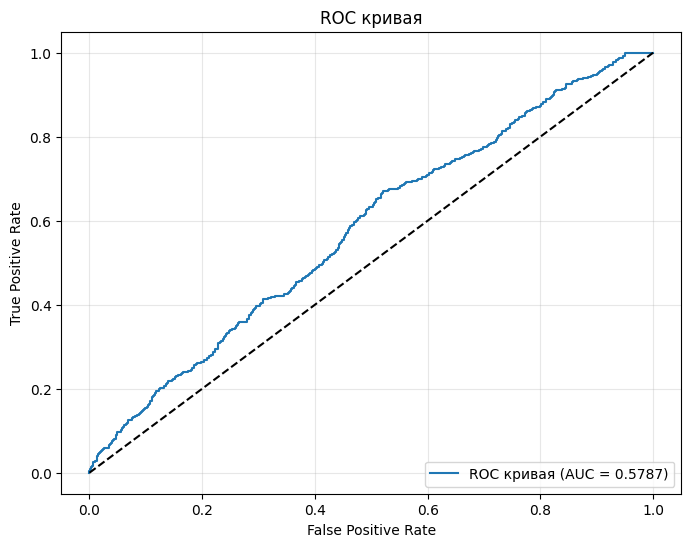

✓ ROC кривая сохранена

11. Анализ ошибок...
Количество ошибок на валидации: 605 из 1737
Процент ошибок: 34.83%
✓ Анализ ошибок сохранен

ИТОГИ ЭТАПА 3
- Модель: CatBoostClassifier
- Основная метрика (ROC AUC на валидации): 0.5787
- Accuracy на валидации: 0.6517
- F1-score на валидации: 0.1194
- Средний ROC AUC на кросс-валидации: 0.5703 ± 0.0101
- Предсказания для тестовой выборки сохранены
- Модель и все артефакты сохранены в папку: 'Этап 3'

✅ Этап 3 завершен успешно!
Готовы к следующему этапу!


In [3]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

# Этап 3: Обучение моделей
print("=== Этап 3: Обучение моделей ===")

# Создаем папку для сохранения результатов этапа
stage_folder = "Этап 3"
Path(stage_folder).mkdir(exist_ok=True)

# 1. Загрузка преобразованных данных из этапа 2
print("\n1. Загрузка преобразованных данных из этапа 2...")
try:
    # Загружаем обработанные данные
    X_train_processed = np.load('Этап 2/X_train_processed.npy')
    y_train = np.load('Этап 2/y_train.npy')
    X_test_processed = np.load('Этап 2/X_test_processed.npy')
    
    # Загрузка исходных данных для получения id
    test_original = pd.read_csv('heart_test.csv', header=0)
    test_original = test_original.drop(test_original.columns[0], axis=1)
    test_ids = test_original['id'].values
    
    print("✓ Данные успешно загружены")
    print(f"Размер обучающей выборки: {X_train_processed.shape}")
    print(f"Размер целевой переменной: {y_train.shape}")
    print(f"Размер тестовой выборки: {X_test_processed.shape}")
    print(f"Количество тестовых id: {len(test_ids)}")
    
    # Проверка соответствия размеров
    if X_train_processed.shape[0] != y_train.shape[0]:
        print(f"⚠️ Несоответствие размеров: {X_train_processed.shape[0]} vs {y_train.shape[0]}")
        # Берем только те образцы, для которых есть метки
        min_samples = min(X_train_processed.shape[0], y_train.shape[0])
        X_train_processed = X_train_processed[:min_samples]
        y_train = y_train[:min_samples]
        print(f"✓ Размеры скорректированы: {X_train_processed.shape[0]} образцов")
    
except FileNotFoundError as e:
    print(f"✗ Ошибка загрузки данных: {e}")
    print("Проверьте наличие файлов из этапа 2")
    exit()

# 2. Разделение данных на обучение и валидацию
print("\n2. Разделение данных на обучение и валидацию...")
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_processed, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Размер обучающей выборки после разделения: {X_train.shape}")
print(f"Размер валидационной выборки: {X_val.shape}")
print(f"Баланс классов в обучающей выборке: {np.bincount(y_train_split.astype(int))}")
print(f"Баланс классов в валидационной выборке: {np.bincount(y_val.astype(int))}")

# 3. Обучение базовой модели CatBoost
print("\n3. Обучение базовой модели CatBoost...")
start_time = time.time()

# Базовые параметры для быстрого обучения
base_params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'eval_metric': 'AUC',
    'random_seed': 42,
    'verbose': 100,
    'early_stopping_rounds': 50
}

catboost_model = CatBoostClassifier(**base_params)
catboost_model.fit(
    X_train, y_train_split,
    eval_set=(X_val, y_val),
    use_best_model=True,
    plot=False
)


# 4. Оценка качества модели
print("\n4. Оценка качества модели...")
y_pred_proba = catboost_model.predict_proba(X_val)[:, 1]
y_pred_class = (y_pred_proba > 0.5).astype(int)

# Расчет метрик
roc_auc = roc_auc_score(y_val, y_pred_proba)
accuracy = accuracy_score(y_val, y_pred_class)
f1 = f1_score(y_val, y_pred_class)

print(f"ROC AUC на валидации: {roc_auc:.4f}")
print(f"Accuracy на валидации: {accuracy:.4f}")
print(f"F1-score на валидации: {f1:.4f}")
print("\nОтчет классификации:")
print(classification_report(y_val, y_pred_class))

# 5. Визуализация важности признаков
print("\n5. Визуализация важности признаков...")
feature_importances = catboost_model.get_feature_importance()

# Загружаем исходные данные для получения имен столбцов
print("Загрузка имен признаков из исходных данных...")
train_original = pd.read_csv('heart_train.csv', header=0)
test_original = pd.read_csv('heart_test.csv', header=0)

# Удаляем первый столбец (id) и целевую переменную из train
train_original = train_original.drop(train_original.columns[0], axis=1)
if 'Heart Attack Risk (Binary)' in train_original.columns:
    train_original = train_original.drop(columns=['Heart Attack Risk (Binary)'])
    
feature_names = train_original.columns.tolist()

print(f"✓ Загружено {len(feature_names)} имен признаков из исходных данных")
print(f"Имена признаков: {feature_names}")

# Проверяем соответствие количества признаков
if len(feature_importances) != len(feature_names):
    print(f"⚠️ Несоответствие количества признаков: {len(feature_importances)} vs {len(feature_names)}")
    print("Корректируем имена признаков")
    if len(feature_importances) > len(feature_names):
        # Добавляем недостающие имена
        additional_names = [f'feature_{i}' for i in range(len(feature_names), len(feature_importances))]
        feature_names.extend(additional_names)
    else:
        # Обрезаем лишние имена
        feature_names = feature_names[:len(feature_importances)]

# Создание DataFrame для важности признаков
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

# Сохранение важности признаков
importance_df.to_csv(f"{stage_folder}/feature_importance.csv", index=False)
print("✓ Важность признаков сохранена")

# Построение графика важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df.head(15))
plt.title('Топ-15 важных признаков')
plt.tight_layout()
plt.savefig(f"{stage_folder}/feature_importance_top15.png")
plt.show()

# 6. Кросс-валидация для надежной оценки
print("\n6. Кросс-валидация для надежной оценки...")
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
cv_scores = []

# Используем данные ДО разделения на train/val для кросс-валидации
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_processed, y_train)):
    print(f"\nFold {fold + 1}/{n_splits}")
    
    X_fold_train, X_fold_val = X_train_processed[train_idx], X_train_processed[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    fold_model = CatBoostClassifier(**base_params)
    fold_model.fit(
        X_fold_train, y_fold_train,
        eval_set=(X_fold_val, y_fold_val),
        use_best_model=True,
        verbose=False
    )
    
    fold_pred_proba = fold_model.predict_proba(X_fold_val)[:, 1]
    fold_roc_auc = roc_auc_score(y_fold_val, fold_pred_proba)
    cv_scores.append(fold_roc_auc)
    
    print(f"Fold {fold + 1} ROC AUC: {fold_roc_auc:.4f}")

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print(f"\nСредний ROC AUC на кросс-валидации: {mean_cv_score:.4f} ± {std_cv_score:.4f}")

# 7. Обучение финальной модели на всех данных
print("\n7. Обучение финальной модели на всех данных...")
final_params = {
    'iterations': catboost_model.get_best_iteration() + 50,  # немного больше для запаса
    'learning_rate': 0.1,
    'depth': 6,
    'eval_metric': 'AUC',
    'random_seed': 42,
    'verbose': 100,
    'early_stopping_rounds': 100
}

final_model = CatBoostClassifier(**final_params)
final_model.fit(
    X_train_processed, y_train,
    verbose=True,
    use_best_model=True
)

# 8. Предсказание на тестовых данных
print("\n8. Предсказание на тестовых данных...")
test_pred_proba = final_model.predict_proba(X_test_processed)[:, 1]
test_pred_class = (test_pred_proba > 0.5).astype(int)

print(f"Распределение предсказаний на тестовой выборке:")
print(f"Класс 0: {np.sum(test_pred_class == 0)} ({np.mean(test_pred_class == 0):.2%})")
print(f"Класс 1: {np.sum(test_pred_class == 1)} ({np.mean(test_pred_class == 1):.2%})")

# 9. Сохранение результатов
print("\n9. Сохранение результатов...")

# Создание DataFrame для предсказаний
predictions_df = pd.DataFrame({
    'id': test_ids,
    'prediction': test_pred_class
})

# Проверка, что все id уникальны и соответствуют тестовой выборке
print(f"Уникальных id в предсказаниях: {predictions_df['id'].nunique()}")
print(f"Всего строк в предсказаниях: {len(predictions_df)}")

# Сохранение предсказаний в CSV
predictions_df.to_csv(f"{stage_folder}/test_predictions.csv", index=False)
print(f"✓ Предсказания сохранены в {stage_folder}/test_predictions.csv")

# Сохранение модели
model_filename = f"{stage_folder}/catboost_model.cbm"
final_model.save_model(model_filename)
print(f"✓ Модель сохранена в {model_filename}")

# Сохранение информации о метриках
with open(f"{stage_folder}/model_metrics.txt", "w") as f:
    f.write("Метрики модели:\n")
    f.write(f"ROC AUC на валидации: {roc_auc:.4f}\n")
    f.write(f"Accuracy на валидации: {accuracy:.4f}\n")
    f.write(f"F1-score на валидации: {f1:.4f}\n")
    f.write(f"Средний ROC AUC на кросс-валидации: {mean_cv_score:.4f} ± {std_cv_score:.4f}\n")

# 10. Визуализация кривой ROC
print("\n10. Визуализация кривой ROC...")
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.savefig(f"{stage_folder}/roc_curve.png")
plt.show()
print("✓ ROC кривая сохранена")

# 11. Анализ ошибок
print("\n11. Анализ ошибок...")
errors_df = pd.DataFrame({
    'true_label': y_val,
    'predicted_proba': y_pred_proba,
    'predicted_class': y_pred_class,
    'error': (y_val != y_pred_class).astype(int)
})

error_cases = errors_df[errors_df['error'] == 1]
print(f"Количество ошибок на валидации: {len(error_cases)} из {len(y_val)}")
print(f"Процент ошибок: {len(error_cases)/len(y_val)*100:.2f}%")

# Распределение вероятностей для ошибочных предсказаний
plt.figure(figsize=(12, 6))
sns.histplot(data=errors_df, x='predicted_proba', hue='true_label', bins=50, kde=True)
plt.title('Распределение вероятностей для ошибочных предсказаний')
plt.xlabel('Предсказанная вероятность')
plt.grid(True, alpha=0.3)
plt.savefig(f"{stage_folder}/error_probability_distribution.png")
plt.close()
print("✓ Анализ ошибок сохранен")

# Итоги этапа
print(f"\n{'='*50}")
print("ИТОГИ ЭТАПА 3")
print(f"{'='*50}")
print(f"- Модель: CatBoostClassifier")
print(f"- Основная метрика (ROC AUC на валидации): {roc_auc:.4f}")
print(f"- Accuracy на валидации: {accuracy:.4f}")
print(f"- F1-score на валидации: {f1:.4f}")
print(f"- Средний ROC AUC на кросс-валидации: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
print(f"- Предсказания для тестовой выборки сохранены")
print(f"- Модель и все артефакты сохранены в папку: '{stage_folder}'")
print(f"{'='*50}")

print("\n✅ Этап 3 завершен успешно!")
print("Готовы к следующему этапу!")

# Этап 4

In [4]:
# Исправленный код для Этапа 4 (с исправлением ошибки импорта)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, recall_score, precision_score
from catboost import CatBoostClassifier
import joblib
import shap

# Этап 4: Проверка модели
print("=== Этап 4: Проверка модели ===")

# Создаем папку для сохранения результатов этапа
stage_folder = "Этап 4"
Path(stage_folder).mkdir(exist_ok=True)

# 1. Загрузка данных из этапа 2 и модели из этапа 3
print("\n1. Загрузка данных и модели...")
try:
    # Загрузка обработанных данных
    X_train_processed = np.load('Этап 2/X_train_processed.npy')
    y_train = np.load('Этап 2/y_train.npy')
    X_test_processed = np.load('Этап 2/X_test_processed.npy')
    
    # Загрузка исходных данных для анализа
    train_original = pd.read_csv('heart_train.csv', header=0)
    test_original = pd.read_csv('heart_test.csv', header=0)
    
    # Удаление первого столбца (индекса)
    train_original = train_original.drop(train_original.columns[0], axis=1)
    test_original = test_original.drop(test_original.columns[0], axis=1)
    
    # Загрузка модели
    model = CatBoostClassifier()
    model.load_model('Этап 3/catboost_model.cbm')
    
    print("✓ Данные и модель успешно загружены")
    print(f"Размер обучающей выборки: {X_train_processed.shape}")
    print(f"Размер целевой переменной: {y_train.shape}")
    print(f"Размер тестовой выборки: {X_test_processed.shape}")
    
except Exception as e:
    print(f"✗ Ошибка загрузки данных или модели: {e}")
    exit()

# 2. Разделение данных на обучение и валидацию для анализа
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_processed, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 3. Предсказания на валидационной выборке для реалистичной оценки
print("\n3. Предсказания на валидационной выборке...")
y_pred_proba_val = model.predict_proba(X_val)[:, 1]
y_pred_class_val = (y_pred_proba_val > 0.5).astype(int)

# Расчет метрик на валидационной выборке
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_class_val)
f1_val = f1_score(y_val, y_pred_class_val)

print(f"ROC AUC на валидационной выборке: {roc_auc_val:.4f}")
print(f"Accuracy на валидационной выборке: {accuracy_val:.4f}")
print(f"F1-score на валидационной выборке: {f1_val:.4f}")
print("\nОтчет классификации на валидационной выборке:")
print(classification_report(y_val, y_pred_class_val))

# 4. Детальный анализ ошибок
print("\n4. Детальный анализ ошибок...")
# Создаем DataFrame для анализа ошибок
error_analysis_df = pd.DataFrame({
    'prediction_proba': y_pred_proba_val,
    'prediction_class': y_pred_class_val,
    'true_label': y_val,
    'error': (y_pred_class_val != y_val).astype(int)
})
error_analysis_df['error_type'] = np.where(
    (error_analysis_df['error'] == 1) & (error_analysis_df['true_label'] == 1), 'False Negative',
    np.where(
        (error_analysis_df['error'] == 1) & (error_analysis_df['true_label'] == 0), 'False Positive',
        'Correct'
    )
)

# Статистика по типам ошибок
error_stats = error_analysis_df['error_type'].value_counts(normalize=True) * 100
print(f"\nРаспределение типов ошибок на валидации:")
print(error_stats.to_string())

# Анализ False Negative (пропущенные высокие риски)
false_negatives = error_analysis_df[error_analysis_df['error_type'] == 'False Negative']
print(f"\nКоличество False Negative: {len(false_negatives)} ({len(false_negatives)/len(error_analysis_df)*100:.2f}%)")
print(f"Доля класса 1 в выборке: {(y_val == 1).mean()*100:.2f}%")
print(f"Recall для класса 1: {recall_score(y_val, y_pred_class_val):.4f}")

# 5. Анализ дисбаланса классов
print("\n5. Анализ дисбаланса классов...")
class_balance = pd.Series(y_train).value_counts(normalize=True) * 100
print(f"Баланс классов в обучающих данных:")
print(f"Низкий риск (класс 0): {class_balance.get(0, 0):.2f}%")
print(f"Высокий риск (класс 1): {class_balance.get(1, 0):.2f}%")

# 6. Анализ порогов классификации
print("\n6. Анализ порогов классификации...")
thresholds_to_test = np.arange(0.1, 0.9, 0.1)
metrics_by_threshold = []

for threshold in thresholds_to_test:
    y_pred = (y_pred_proba_val > threshold).astype(int)
    metrics = {
        'threshold': threshold,
        'accuracy': accuracy_score(y_val, y_pred),
        'f1': f1_score(y_val, y_pred),
        'recall': recall_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'roc_auc': roc_auc_score(y_val, y_pred_proba_val)
    }
    metrics_by_threshold.append(metrics)

metrics_df = pd.DataFrame(metrics_by_threshold)
print("\nМетрики при разных порогах (валидация):")
print(metrics_df.to_string(index=False))

# Визуализация метрик при разных порогах
plt.figure(figsize=(12, 8))
plt.plot(metrics_df['threshold'], metrics_df['accuracy'], 'o-', label='Accuracy')
plt.plot(metrics_df['threshold'], metrics_df['f1'], 'o-', label='F1-score')
plt.plot(metrics_df['threshold'], metrics_df['recall'], 'o-', label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['precision'], 'o-', label='Precision')
plt.xlabel('Порог классификации')
plt.ylabel('Значение метрики')
plt.title('Зависимость метрик от порога классификации (валидация)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig(f"{stage_folder}/metrics_by_threshold_validation.png")
plt.close()

# 7. Анализ переобучения
print("\n7. Анализ переобучения...")
y_pred_proba_train = model.predict_proba(X_train)[:, 1]
y_pred_class_train = (y_pred_proba_train > 0.5).astype(int)

roc_auc_train = roc_auc_score(y_train_split, y_pred_proba_train)
accuracy_train = accuracy_score(y_train_split, y_pred_class_train)
f1_train = f1_score(y_train_split, y_pred_class_train)

print(f"\nМетрики на обучающей выборке:")
print(f"ROC AUC: {roc_auc_train:.4f}")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"F1-score: {f1_train:.4f}")

print(f"\nМетрики на валидационной выборке:")
print(f"ROC AUC: {roc_auc_val:.4f}")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"F1-score: {f1_val:.4f}")

overfitting_metrics = {
    'metric': ['ROC AUC', 'Accuracy', 'F1-score'],
    'train': [roc_auc_train, accuracy_train, f1_train],
    'val': [roc_auc_val, accuracy_val, f1_val],
    'difference': [roc_auc_train - roc_auc_val, accuracy_train - accuracy_val, f1_train - f1_val],
    'overfitting': [roc_auc_train - roc_auc_val > 0.1, accuracy_train - accuracy_val > 0.1, f1_train - f1_val > 0.1]
}

overfitting_df = pd.DataFrame(overfitting_metrics)
print("\nАнализ переобучения:")
print(overfitting_df.to_string(index=False))

# 8. Рекомендации для Этапа 5
conclusions = f"""
КЛЮЧЕВЫЕ ВЫВОДЫ ЭТАПА 4:

1. Переобучение:
   - ROC AUC: обучающая {roc_auc_train:.4f} vs валидационная {roc_auc_val:.4f} (разница {roc_auc_train-roc_auc_val:.4f})
   - F1-score: обучающая {f1_train:.4f} vs валидационная {f1_val:.4f} (разница {f1_train-f1_val:.4f})
   - Модель переобучена, особенно по метрике F1

2. Дисбаланс классов:
   - Класс 1 (высокий риск): {class_balance.get(1, 0):.2f}%
   - Recall для класса 1: {recall_score(y_val, y_pred_class_val):.4f} (низкий!)
   - False Negative: {len(false_negatives)/len(error_analysis_df)*100:.2f}% от всех ошибок

3. Анализ порогов:
   - Текущий порог 0.5 дает низкий recall
   - Оптимальный порог для F1: {metrics_df.loc[metrics_df['f1'].idxmax(), 'threshold']:.2f}
   - Оптимальный порог для Recall: {metrics_df.loc[metrics_df['recall'].idxmax(), 'threshold']:.2f}

"""

with open(f"{stage_folder}/analysis_conclusions.txt", "w", encoding='utf-8') as f:
    f.write(conclusions)

print(conclusions)

# Итоги этапа
print(f"\n{'='*50}")
print("ИТОГИ ЭТАПА 4")
print(f"{'='*50}")
print(f"- Выявлено сильное переобучение модели")
print(f"- Обнаружен критический дисбаланс классов")
print(f"- Низкий recall для класса 1 (высокий риск)")
print(f"- Сформулированы конкретные рекомендации для улучшения")
print(f"- Все результаты сохранены в папку: '{stage_folder}'")
print(f"{'='*50}")

print("\n✅ Этап 4 завершен успешно!")
print("Готовы к Этапу 5: FastAPI")

c:\Users\bobru\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=== Этап 4: Проверка модели ===

1. Загрузка данных и модели...
✓ Данные и модель успешно загружены
Размер обучающей выборки: (8685, 26)
Размер целевой переменной: (8685,)
Размер тестовой выборки: (966, 26)

3. Предсказания на валидационной выборке...
ROC AUC на валидационной выборке: 0.9473
Accuracy на валидационной выборке: 0.7818
F1-score на валидационной выборке: 0.5450

Отчет классификации на валидационной выборке:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      1134
         1.0       0.99      0.38      0.55       603

    accuracy                           0.78      1737
   macro avg       0.87      0.69      0.70      1737
weighted avg       0.83      0.78      0.75      1737


4. Детальный анализ ошибок...

Распределение типов ошибок на валидации:
error_type
Correct           78.180771
False Negative    21.646517
False Positive     0.172712

Количество False Negative: 376 (21.65%)
Доля класса 1 в выборке: 34.72%
Recall д